In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #slightly different functionality that matplotlib

This project investigates rice production trends in selected Asian countries from 1980 to 2023. I will analyze changes in yield and area harvested over time, and will experiment with visualization techniques to compare historical and recent values.

Working with panel data (cross-sectional and time series data)

In [60]:
# load in data
data_df = pd.read_csv("FAOSTAT-production-data-1980-2023.csv")

In [62]:
data_df.head(5)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,159,China,5312,Area harvested,113,Rice,1980,1980,ha,34482478.0,A,Official figure,NaN
1,QCL,Crops and livestock products,159,China,5412,Yield,113,Rice,1980,1980,kg/ha,4143.5,A,Official figure,NaN
2,QCL,Crops and livestock products,159,China,5510,Production,113,Rice,1980,1980,t,142876522.0,A,Official figure,NaN
3,QCL,Crops and livestock products,159,China,5312,Area harvested,113,Rice,1981,1981,ha,33928110.0,A,Official figure,NaN
4,QCL,Crops and livestock products,159,China,5412,Yield,113,Rice,1981,1981,kg/ha,4331.5,A,Official figure,NaN


## Exploratory data analysis

In [64]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       924 non-null    object 
 1   Domain            924 non-null    object 
 2   Area Code (M49)   924 non-null    int64  
 3   Area              924 non-null    object 
 4   Element Code      924 non-null    int64  
 5   Element           924 non-null    object 
 6   Item Code (CPC)   924 non-null    int64  
 7   Item              924 non-null    object 
 8   Year Code         924 non-null    int64  
 9   Year              924 non-null    int64  
 10  Unit              924 non-null    object 
 11  Value             924 non-null    float64
 12  Flag              924 non-null    object 
 13  Flag Description  924 non-null    object 
 14  Note              1 non-null      object 
dtypes: float64(1), int64(5), object(9)
memory usage: 108.4+ KB


In [80]:
#look at values in each column
for col in data_df.columns:
    if (col != "Value"):
        print(col, ":", data_df[col].unique())

Domain Code : ['QCL']
Domain : ['Crops and livestock products']
Area Code (M49) : [159 356 360 104 410 764 704]
Area : ['China' 'India' 'Indonesia' 'Myanmar' 'Republic of Korea' 'Thailand'
 'Viet Nam']
Element Code : [5312 5412 5510]
Element : ['Area harvested' 'Yield' 'Production']
Item Code (CPC) : [113]
Item : ['Rice']
Year Code : [1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
 2022 2023]
Year : [1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
 2022 2023]
Unit : ['ha' 'kg/ha' 't']
Flag : ['A' 'E' 'I' 'X']
Flag Description : ['Official figure' 'Estimated value' 'Imputed value'
 'Figure from international organizations']
Note : [nan 'Unofficial figure']


In [68]:
#check how many imputed values, estimated, etc.
data_df["Flag"].value_counts()

Flag
A    805
E    117
I      1
X      1
Name: count, dtype: int64

In [74]:
#check the proportion of estimated values for each country
for country in data_df["Area"].unique():
    print(f"{country}: {data_df[data_df["Area"] == country]["Flag"].value_counts()}")
    print()


China: Flag
E    83
A    49
Name: count, dtype: int64

India: Flag
A    132
Name: count, dtype: int64

Indonesia: Flag
A    101
E     31
Name: count, dtype: int64

Myanmar: Flag
A    129
I      1
E      1
X      1
Name: count, dtype: int64

Republic of Korea: Flag
A    132
Name: count, dtype: int64

Thailand: Flag
A    130
E      2
Name: count, dtype: int64

Viet Nam: Flag
A    132
Name: count, dtype: int64



In [82]:
#drop columns not using
data_df.drop(columns=["Domain Code","Domain","Item Code (CPC)","Year Code","Note"])

,Area Code (M49),Area,Element Code,Element,Item,Year,Unit,Value,Flag,Flag Description
0,159,China,5312,Area harvested,Rice,1980,ha,3.448248e+07,A,Official figure
1,159,China,5412,Yield,Rice,1980,kg/ha,4.143500e+03,A,Official figure
2,159,China,5510,Production,Rice,1980,t,1.428765e+08,A,Official figure
3,159,China,5312,Area harvested,Rice,1981,ha,3.392811e+07,A,Official figure
4,159,China,5412,Yield,Rice,1981,kg/ha,4.331500e+03,A,Official figure
...,...,...,...,...,...,...,...,...,...,...
919,704,Viet Nam,5412,Yield,Rice,2022,kg/ha,6.018000e+03,A,Official figure
920,704,Viet Nam,5510,Production,Rice,2022,t,4.266080e+07,A,Official figure
921,704,Viet Nam,5312,Area harvested,Rice,2023,ha,7.115058e+06,A,Official figure
922,704,Viet Nam,5412,Yield,Rice,2023,kg/ha,6.113500e+03,A,Official figure


In [96]:
#drop imputed and X flag values
data_df = data_df[(data_df["Flag"] != "X") & (data_df["Flag"]!="I")] #wrap each condition in parentheses

### Simple plots

In [127]:
yield_df = data_df[data_df["Element"] == "Yield"]

#get mean yield for each country over 5 year blocks
yield_df.groupby("Area")['Value'].agg(['mean','min','max']).reset_index()

,Area,mean,min,max
0,China,6143.627273,4143.5,7132.5
1,India,3057.236364,1849.7,4322.3
2,Indonesia,4551.629545,3292.8,5358.8
3,Myanmar,3455.825000,2773.9,4066.4
4,Republic of Korea,6496.268182,4307.6,7222.8
5,Thailand,2599.759091,1887.8,3186.7
6,Viet Nam,4342.734091,2079.8,6113.5


Text(0, 0.5, 'Yield (kg/ha)')

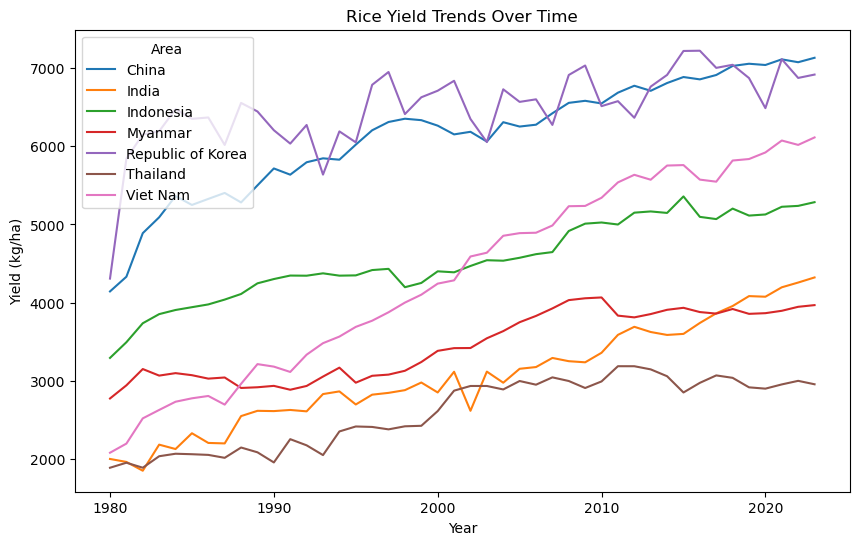

In [131]:
#graph yield over time by country
units = yield_df["Unit"].unique()[0]
plt.figure(figsize=(10,6))
sns.lineplot(data=yield_df,x='Year',y='Value',hue='Area') #filters by Area
plt.title('Rice Yield Trends Over Time')
plt.ylabel(f"Yield ({units})")

In [ ]:
plt.bar(data_df["Area"],data_df["Value"])
plt.xlabel('Country')
plt.ylabel(
plt.xticks(rotation=30)

Text(0, 0.5, 'Area (ha)')

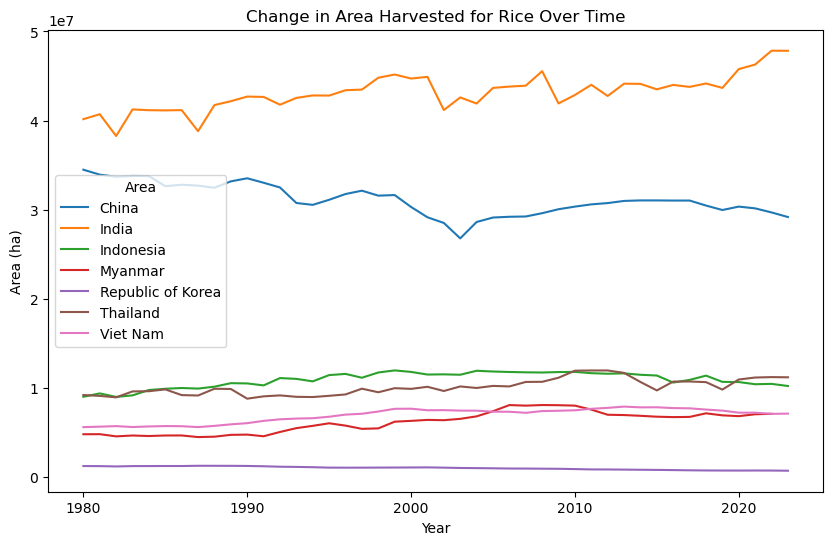

In [133]:
#graph area harvested over time by country
area_harvested_df = data_df[data_df["Element"] == "Area harvested"]

units = area_harvested_df["Unit"].unique()[0]
plt.figure(figsize=(10,6))
sns.lineplot(data=area_harvested_df,x='Year',y='Value',hue='Area') #filters by Area
plt.title('Change in Area Harvested for Rice Over Time')
plt.ylabel(f"Area ({units})")

Relatively stable. It seems that the countries had to boost productivity then, to increase yields while still operating on a similar amount of land. But we need to better track the units to see how big of a change this really is.

In [236]:
area_summary = area_harvested_df.groupby("Area")['Value'].agg(["min","max"]).reset_index()
area_summary["range"] = area_summary["max"] - area_summary["min"]

most_recent_vals = area_harvested_df.groupby("Area").apply(lambda x: x.loc[x['Year'].idxmax(), 'Value'])
oldest_vals = area_harvested_df.groupby("Area").apply(lambda x: x.loc[x['Year'].idxmin(), 'Value'])
area_summary["2023 value"] =  most_recent_vals.tolist()
area_summary["1980 value"] = oldest_vals.tolist()
area_summary["2023 vs. 1980"] = area_summary["2023 value"] - area_summary["1980 value"] 
area_summary["Unit"] = units
area_summary

/var/folders/6k/pn7_fvfd4t9fhmt03ygvbwz80000gn/T/ipykernel_69336/3190118984.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  most_recent_vals = area_harvested_df.groupby("Area").apply(lambda x: x.loc[x['Year'].idxmax(), 'Value'])
/var/folders/6k/pn7_fvfd4t9fhmt03ygvbwz80000gn/T/ipykernel_69336/3190118984.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  oldest_vals = area_harvested_df.groupby("Area").a

,Area,min,max,range,2023 value,1980 value,2023 vs. 1980,Unit
0,China,26779954.0,34482478.0,7702524.0,29171100.0,34482478.0,-5311378.0,ha
1,India,38262000.0,47832000.0,9570000.0,47828000.0,40151504.0,7676496.0,ha
2,Indonesia,8988455.0,11963204.0,2974749.0,10213705.0,9005065.0,1208640.0,ha
3,Myanmar,4482800.0,8078000.0,3595200.0,7090300.0,4800900.0,2289400.0,ha
4,Republic of Korea,708012.0,1262324.0,554312.0,708012.0,1233038.0,-525026.0,ha
5,Thailand,8791885.0,11956781.0,3164896.0,11189393.0,9200080.0,1989313.0,ha
6,Viet Nam,5600200.0,7902813.0,2302613.0,7115058.0,5600200.0,1514858.0,ha


In [238]:
#evalute area harvested proportional to country size --> Source: Our World in Data
land_area_df = pd.read_csv("https://ourworldindata.org/grapher/land-area-hectares.csv?v=1&csvType=filtered&useColumnShortNames=true&country=European+Union~CHN~IND~IDN~MMR~KOR~THA~VNM", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

In [240]:
land_area_df.rename(columns={"land_area__00006601__area__005110__hectares": "land_area"},inplace = True)

In [242]:
land_area_df["Unit"] = units #land area is in hectares
land_area_df

,Entity,Code,Year,land_area,time,Unit
0,China,CHN,2022,938821000,2022,ha
1,India,IND,2022,297319000,2022,ha
2,Indonesia,IDN,2022,189255550,2022,ha
3,Myanmar,MMR,2022,65267000,2022,ha
4,South Korea,KOR,2022,9760000,2022,ha
5,Thailand,THA,2022,51089000,2022,ha
6,Vietnam,VNM,2022,31342900,2022,ha


In [244]:
#proportion of land for rice
area_summary_prop_to_land = area_summary

for col in ['min', 'max', 'range','2023 value', '1980 value', '2023 vs. 1980']:
    area_summary_prop_to_land[col] = area_summary_prop_to_land[col] / land_area_df["land_area"]
    
area_summary_prop_to_land

,Area,min,max,range,2023 value,1980 value,2023 vs. 1980,Unit
0,China,0.028525,0.036730,0.008204,0.031072,0.036730,-0.005657,ha
1,India,0.128690,0.160878,0.032188,0.160864,0.135045,0.025819,ha
2,Indonesia,0.047494,0.063212,0.015718,0.053968,0.047582,0.006386,ha
3,Myanmar,0.068684,0.123769,0.055084,0.108635,0.073558,0.035077,ha
4,Republic of Korea,0.072542,0.129336,0.056794,0.072542,0.126336,-0.053794,ha
5,Thailand,0.172090,0.234038,0.061949,0.219018,0.180079,0.038938,ha
6,Viet Nam,0.178675,0.252140,0.073465,0.227007,0.178675,0.048332,ha


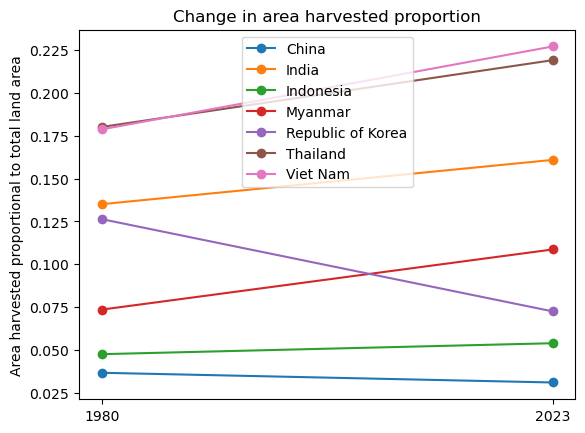

In [254]:
#plot now that its proportional
val_1980 = area_summary_prop_to_land["1980 value"].tolist()
val_2023 =area_summary_prop_to_land["2023 value"].tolist()
countries = area_summary_prop_to_land["Area"]

for i in range(len(countries)):
    plt.plot([1980,2023],[val_1980[i], val_2023[i]], marker='o', label=countries[i])

plt.xticks([1980, 2023])
plt.ylabel("Area harvested proportional to total land area")
plt.title("Change in area harvested proportion")
plt.legend()

It's evident here that although China has the second-highest area harvested out of all the selected countries, proportional to its land area, the area harvested is actually the smallest out of all countries. 

## Bring in population, employment and micro indicators data sets
### Identifying good predictors
These datasets come from FAOSTAT, figures are typically from international organizations

In [409]:
employment_data = pd.read_csv("FAOSTAT-employment-data.csv")
population_data = pd.read_csv("FAOSTAT-population-data.csv")
macro_data = pd.read_csv("FAOSTAT-macroecon-data.csv")

Sources for the employment data include labour force surveys, the FAO model, the ILO, household surveys, and a small amount came from official estimates and other surveys.

In [412]:
employment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3176 entries, 0 to 3175
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       3176 non-null   object 
 1   Domain            3176 non-null   object 
 2   Area Code (M49)   3176 non-null   int64  
 3   Area              3176 non-null   object 
 4   Indicator Code    3176 non-null   int64  
 5   Indicator         3176 non-null   object 
 6   Sex Code          3176 non-null   int64  
 7   Sex               3176 non-null   object 
 8   Year Code         3176 non-null   int64  
 9   Year              3176 non-null   int64  
 10  Element Code      3176 non-null   int64  
 11  Element           3176 non-null   object 
 12  Source Code       3176 non-null   int64  
 13  Source            3176 non-null   object 
 14  Unit              3176 non-null   object 
 15  Value             3176 non-null   float64
 16  Flag              3176 non-null   object 


In [487]:
#narrow down employment indicators , keeping ones with most data and relevance
employment_data = employment_data[(employment_data["Indicator"] == "Employment in agriculture - ILO modelled estimates") | (employment_data["Indicator"] == "Share of employment in agriculture in total employment - ILO Modelled Estimates")]

In [489]:
employment_data.drop(columns=["Year Code", "Sex Code", "Sex", "Domain Code", "Domain", "Area Code (M49)"],inplace=True) #since not separating gender, remove columns
employment_data["Area"].value_counts() #even amount of data for each country after keeping just 2 indicators

Area
China                64
India                64
Indonesia            64
Myanmar              64
Republic of Korea    64
Thailand             64
Viet Nam             64
Name: count, dtype: int64

In [418]:
population_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540 entries, 0 to 1539
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       1540 non-null   object 
 1   Domain            1540 non-null   object 
 2   Area Code (M49)   1540 non-null   int64  
 3   Area              1540 non-null   object 
 4   Element Code      1540 non-null   int64  
 5   Element           1540 non-null   object 
 6   Item Code         1540 non-null   int64  
 7   Item              1540 non-null   object 
 8   Year Code         1540 non-null   int64  
 9   Year              1540 non-null   int64  
 10  Unit              1540 non-null   object 
 11  Value             1540 non-null   float64
 12  Flag              1540 non-null   object 
 13  Flag Description  1540 non-null   object 
 14  Note              0 non-null      float64
dtypes: float64(2), int64(5), object(8)
memory usage: 180.6+ KB


In [420]:
population_data.drop(columns=["Area Code (M49)","Domain Code","Domain", "Item Code","Item","Year Code"],inplace=True)
population_data["Element"].value_counts()

Element
Total Population - Both sexes    308
Total Population - Male          308
Total Population - Female        308
Rural population                 308
Urban population                 308
Name: count, dtype: int64

In [422]:
population_data

,Area,Element Code,Element,Year,Unit,Value,Flag,Flag Description,Note
0,China,511,Total Population - Both sexes,1980,1000 No,1006458.644,X,Figure from international organizations,NaN
1,China,512,Total Population - Male,1980,1000 No,512691.668,X,Figure from international organizations,NaN
2,China,513,Total Population - Female,1980,1000 No,493766.976,X,Figure from international organizations,NaN
3,China,551,Rural population,1980,1000 No,810993.444,X,Figure from international organizations,NaN
4,China,561,Urban population,1980,1000 No,205754.823,X,Figure from international organizations,NaN
...,...,...,...,...,...,...,...,...,...
1535,Viet Nam,511,Total Population - Both sexes,2023,1000 No,100352.192,X,Figure from international organizations,NaN
1536,Viet Nam,512,Total Population - Male,2023,1000 No,49150.969,X,Figure from international organizations,NaN
1537,Viet Nam,513,Total Population - Female,2023,1000 No,51201.223,X,Figure from international organizations,NaN
1538,Viet Nam,551,Rural population,2023,1000 No,61175.828,X,Figure from international organizations,NaN


In [424]:
rural = population_data[population_data["Element"] == "Rural population"]
urban = population_data[population_data["Element"] == "Urban population"]

rural_urban_df = rural.groupby("Area").apply(lambda x: x['Value']).reset_index()

/var/folders/6k/pn7_fvfd4t9fhmt03ygvbwz80000gn/T/ipykernel_69336/173646330.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rural_urban_df = rural.groupby("Area").apply(lambda x: x['Value']).reset_index()


In [426]:
rural_urban_df["Year"] = rural["Year"].unique().tolist() * 7 # in ascending order of years, resets each new country
rural_urban_df.rename(columns={"Value":"Rural"},inplace=True)
rural_urban_df["Urban"] = urban.groupby("Area").apply(lambda x: x['Value']).reset_index()["Value"].tolist()
rural_urban_df["Urban:Rural"] = rural_urban_df["Urban"] / rural_urban_df["Rural"] 

/var/folders/6k/pn7_fvfd4t9fhmt03ygvbwz80000gn/T/ipykernel_69336/84934028.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rural_urban_df["Urban"] = urban.groupby("Area").apply(lambda x: x['Value']).reset_index()["Value"].tolist()


In [428]:
rural_urban_df #add ratio of urban to rural population

,Area,level_1,Rural,Year,Urban,Urban:Rural
0,China,3,810993.444,1980,205754.823,0.253707
1,China,8,814531.684,1981,216741.822,0.266094
2,China,13,817712.036,1982,228199.645,0.279071
3,China,18,822595.313,1983,238557.736,0.290006
4,China,23,828062.325,1984,249540.591,0.301355
...,...,...,...,...,...,...
303,Viet Nam,1518,61742.331,2019,35686.730,0.577995
304,Viet Nam,1523,61632.897,2020,36727.248,0.595903
305,Viet Nam,1528,61504.284,2021,37779.862,0.614264
306,Viet Nam,1533,61353.202,2022,38841.525,0.633081


Text(0.5, 1.0, 'Ratio of Urban to Rural Population Over Time')

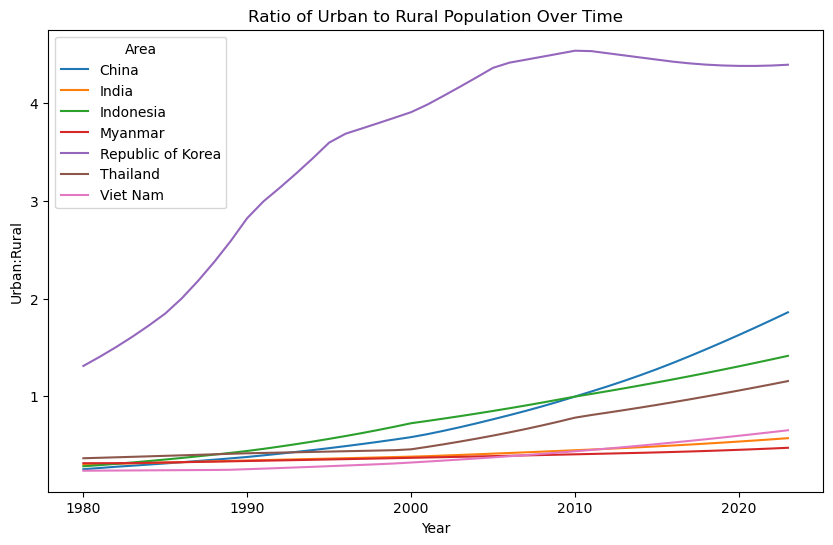

In [430]:
plt.figure(figsize=(10,6))
sns.lineplot(data=rural_urban_df,x="Year",y="Urban:Rural",hue="Area")
plt.title("Ratio of Urban to Rural Population Over Time")

### Note about macro data
Due to sparse availability of Value Added (Agriculture) data alone in FAOSTAT, my analysis uses Value Added (Agriculture, Forestry, Fishing) to proxy agricultural economic output. This allows for the data to range over a longer time period, and is justified as the selected countries have a marjority share in the agricultural economy over others.

In [434]:
#view macro data
macro_data.info()
macro_data.drop(columns=["Domain Code","Domain","Area Code (M49)","Year Code"])
macro_data.replace({"China, mainland": "China"},inplace=True) #Whenever "China" appears, it is always referring to mainland

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       636 non-null    object 
 1   Domain            636 non-null    object 
 2   Area Code (M49)   636 non-null    int64  
 3   Area              636 non-null    object 
 4   Element Code      636 non-null    int64  
 5   Element           636 non-null    object 
 6   Item Code         636 non-null    int64  
 7   Item              636 non-null    object 
 8   Year Code         636 non-null    int64  
 9   Year              636 non-null    int64  
 10  Unit              636 non-null    object 
 11  Value             636 non-null    float64
 12  Flag              636 non-null    object 
 13  Flag Description  636 non-null    object 
 14  Note              0 non-null      float64
dtypes: float64(2), int64(5), object(8)
memory usage: 74.7+ KB


,Area,Element Code,Element,Item Code,Item,Year,Unit,Value,Flag,Flag Description,Note
0,"China, mainland",6110,Value US$,22016,"Value Added (Agriculture, Forestry and Fishing)",1980,million USD,91538.491869,X,Figure from international organizations,NaN
1,"China, mainland",61570,Share of GDP Standard Local Currency,22016,"Value Added (Agriculture, Forestry and Fishing)",1980,%,29.897986,X,Figure from international organizations,NaN
2,"China, mainland",6110,Value US$,22016,"Value Added (Agriculture, Forestry and Fishing)",1981,million USD,91485.003345,X,Figure from international organizations,NaN
3,"China, mainland",61570,Share of GDP Standard Local Currency,22016,"Value Added (Agriculture, Forestry and Fishing)",1981,%,31.593663,X,Figure from international organizations,NaN
4,"China, mainland",6110,Value US$,22016,"Value Added (Agriculture, Forestry and Fishing)",1982,million USD,93910.746172,X,Figure from international organizations,NaN
...,...,...,...,...,...,...,...,...,...,...,...
631,Viet Nam,61570,Share of GDP Standard Local Currency,22016,"Value Added (Agriculture, Forestry and Fishing)",2021,%,12.603090,X,Figure from international organizations,NaN
632,Viet Nam,6110,Value US$,22016,"Value Added (Agriculture, Forestry and Fishing)",2022,million USD,49056.408936,X,Figure from international organizations,NaN
633,Viet Nam,61570,Share of GDP Standard Local Currency,22016,"Value Added (Agriculture, Forestry and Fishing)",2022,%,11.955529,X,Figure from international organizations,NaN
634,Viet Nam,6110,Value US$,22016,"Value Added (Agriculture, Forestry and Fishing)",2023,million USD,51396.237137,X,Figure from international organizations,NaN


In [446]:
#isolate agriculture's value added as a share of GDP
val_added_as_share = macro_data[(macro_data["Element Code"] == 61570) & (macro_data["Item Code"] == 22016)]
val_added_usd = macro_data[(macro_data["Element Code"] == 6110) & (macro_data["Item Code"] == 22016)]

Text(0, 0.5, 'Value Added (USD)')

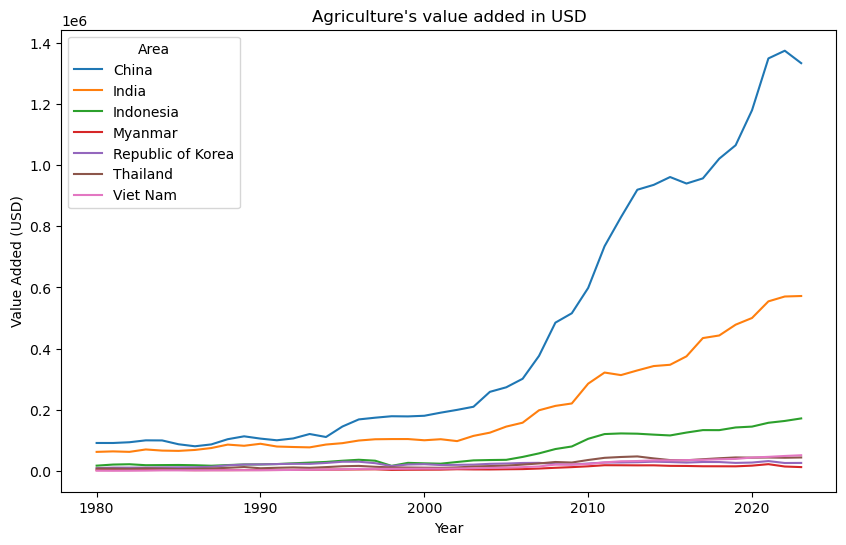

In [448]:
plt.figure(figsize=(10,6))
sns.lineplot(data=val_added_usd,x="Year",y="Value",hue="Area")
plt.title("Agriculture's value added in USD")
plt.ylabel("Value Added (USD)")

Text(0, 0.5, 'Share of GDP (%)')

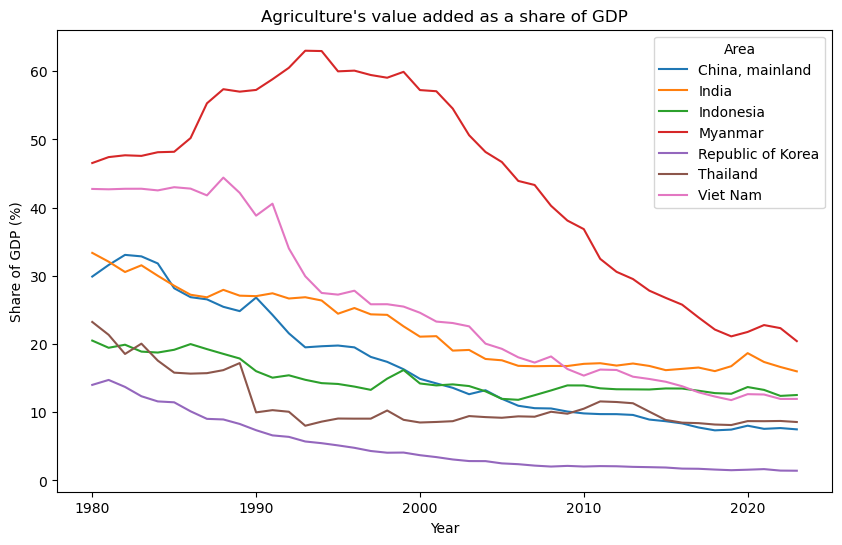

In [444]:
plt.figure(figsize=(10,6))
sns.lineplot(data=val_added_as_share,x="Year",y="Value",hue="Area")
plt.title("Agriculture's value added as a share of GDP")
plt.ylabel("Share of GDP (%)")

## Simple models

Predictors: urban:rural ratio, percent working in agriculture, total population, value added (USD), value added (% GDP)

Dependent variable: yield

note: employed_in_ag and total_population are in 1,000s (so multiple by 1,000 to get full number)

In [463]:
#create new df, index by Area and Year. Add Yield as first column
df = data_df.set_index(["Area","Year"])
df = df[df["Element"] == "Production"]
df = df[["Value"]]
df.rename(columns={"Value": "Yield (kg/ha)"},inplace=True)
df

Yield (kg/ha)
Area     Year               
China    1980   1.428765e+08
         1981   1.469598e+08
         1982   1.647414e+08
         1983   1.720089e+08
         1984   1.810958e+08
...                      ...
Viet Nam 2019   4.349549e+07
         2020   4.276500e+07
         2021   4.385273e+07
         2022   4.266080e+07
         2023   4.349762e+07

[307 rows x 1 columns]

In [471]:
#add population data to columns
temp_df = rural_urban_df.set_index(["Area","Year"])
temp_df["total_population"] = temp_df["Urban"] + temp_df["Rural"]
temp_df = temp_df[["Urban:Rural","total_population"]]
#["Urban:Rural"]
temp_df

Urban:Rural  total_population
Area     Year                               
China    1980     0.253707       1016748.267
         1981     0.266094       1031273.506
         1982     0.279071       1045911.681
         1983     0.290006       1061153.049
         1984     0.301355       1077602.916
...                    ...               ...
Viet Nam 2019     0.577995         97429.061
         2020     0.595903         98360.145
         2021     0.614264         99284.146
         2022     0.633081        100194.727
         2023     0.652357        101084.329

[308 rows x 2 columns]

In [479]:
df = pd.merge(df,temp_df, on=["Area","Year"])

In [499]:
#add employment data
temp_df = employment_data.set_index(["Area","Year"])
temp_1 = temp_df[temp_df["Indicator Code"] == 21144][["Value"]]
temp_1.rename(columns={"Value":"employed_in_ag"},inplace=True)

temp_2 = temp_df[temp_df["Indicator Code"] == 21156][["Value"]]
temp_2.rename(columns={"Value":"percent_employed_in_ag"},inplace=True)

temp_df = pd.merge(temp_1, temp_2, on=["Area","Year"])

employed_in_ag  percent_employed_in_ag
Area     Year                                        
China    1991       384642.48                   58.74
         1992       381288.61                   57.56
         1993       370289.34                   55.49
         1994       359708.83                   53.42
         1995       349563.17                   51.36
...                       ...                     ...
Viet Nam 2018        20599.35                   37.70
         2019        19057.42                   34.70
         2020        17480.94                   32.60
         2021        15604.10                   29.00
         2022        18428.42                   33.60

[224 rows x 2 columns]

In [501]:
df = pd.merge(df,temp_df, on=["Area","Year"])

In [503]:
#add macro data
temp_df = macro_data.set_index(["Area","Year"])

In [512]:

temp_1 = val_added_as_share.set_index(["Area","Year"])[["Value"]]
temp_1.rename(columns={"Value":"val_added_percent_GDP"},inplace=True)

temp_2 = val_added_usd.set_index(["Area","Year"])[["Value"]]
temp_2.rename(columns={"Value":"val_added_mil_USD"},inplace=True)

temp_df = pd.merge(temp_1, temp_2, on=["Area","Year"])

val_added_percent_GDP  val_added_mil_USD
Area     Year                                          
China    1980              29.897986       91538.491869
         1981              31.593663       91485.003345
         1982              33.075892       93910.746172
         1983              32.857214      100132.866025
         1984              31.819743       99825.793377
...                              ...                ...
Viet Nam 2019              11.784529       39403.370777
         2020              12.655404       43865.620543
         2021              12.603090       46187.144625
         2022              11.955529       49056.408936
         2023              11.960486       51396.237137

[308 rows x 2 columns]

In [517]:
df = pd.merge(df,temp_df, on=["Area","Year"])

In [519]:
df

Yield (kg/ha)  Urban:Rural  total_population  employed_in_ag  \
Area     Year                                                                 
China    1991   1.861246e+08     0.395760       1215910.174       384642.48   
         1992   1.882919e+08     0.412968       1231002.333       381288.61   
         1993   1.797469e+08     0.430909       1244385.717       370289.34   
         1994   1.779944e+08     0.449703       1256499.031       359708.83   
         1995   1.872980e+08     0.469363       1267694.303       349563.17   
...                      ...          ...               ...             ...   
Viet Nam 2018   4.404625e+07     0.560533         96491.146        20599.35   
         2019   4.349549e+07     0.577995         97429.061        19057.42   
         2020   4.276500e+07     0.595903         98360.145        17480.94   
         2021   4.385273e+07     0.614264         99284.146        15604.10   
         2022   4.266080e+07     0.633081        100194.727        18428.42   

               percent_employed_in_ag  val_added_percent_GDP  \
Area     Year                                                  
China    1991                   58.74              24.275184   
         1992                   57.56              21.571274   
         1993                   55.49              19.519695   
         1994                   53.42              19.680493   
         1995                   51.36              19.783371   
...                               ...                    ...   
Viet Nam 2018                   37.70              12.306668   
         2019                   34.70              11.784529   
         2020                   32.60              12.655404   
         2021                   29.00              12.603090   
         2022                   33.60              11.955529   

               val_added_mil_USD  
Area     Year                     
China    1991      100347.679346  
         1992      106375.963164  
         1993      120849.537556  
         1994      111061.443301  
         1995      145305.886227  
...                          ...  
Viet Nam 2018       38163.776079  
         2019       39403.370777  
         2020       43865.620543  
         2021       46187.144625  
         2022       49056.408936  

[224 rows x 7 columns]

## Merging of data completed. Prepared for analysis